<a href="https://colab.research.google.com/github/ytwang3579/TextMining/blob/master/Project1_Group4_simple_textcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import warnings

In [0]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [0]:
df_news = pd.read_csv('https://raw.githubusercontent.com/ytwang3579/TextMining/master/taiwantoday_dataset.csv',encoding="unicode_escape")

In [4]:
df_news.head()

,date,title,category,content
0,20200424,Premier Su praises Taiwan Model for combating COVID-19,Politics,"Premier Su Tseng-chang praised the Taiwan Model&rsquo;s effectiveness in managing the spread of COVID-19 during a Cabinet meeting April 23 at the Executive Yuan in Taipei City, crediting its succe..."
1,20200424,MOFA film spotlights how Taiwan Can Help realize Health For All,Politics,"A <a href=""https://www.youtube.com/watch?v=U-tKf7jZsoU&amp;feature=youtu.be"">short film</a> spotlighting how Taiwan Can Help achieve the World Health Organization&rsquo;s goal of Health For All wa..."
2,20200423,VP Chen shares Taiwanâs experience combating coronavirus with The New York Times,Politics,Vice President Chen Chien-jen sat down for an interview with The New York Times earlier this week at the Presidential Office in Taipei City to share Taiwan&rsquo;s experience combating coronavirus...
3,20200423,"Taiwan donates 200,000 surgical masks to Holy See",Politics,"Taiwan donated 200,000 surgical masks to European ally Holy See during a ceremony April 22 at Ministry of Foreign Affairs headquarters in Taipei City.<br /> âµ&nbsp;<br /> âµOverseeing the event..."
4,20200422,Defense minister apologizes over coronavirus infection cluster,Politics,"Minister of National Defense Yen De-fa apologized to the public April 21 over a cluster of coronavirus infections on board the ROC Navy combat support vessel Panshi, vowing to root out the cause.<..."


In [5]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      80 non-null     int64 
 1   title     80 non-null     object
 2   category  80 non-null     object
 3   content   80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [6]:
df_news.isna().sum()

date        0
title       0
category    0
content     0
dtype: int64

In [0]:
data = df_news[['title','content']]

In [8]:
data.head()

,title,content
0,Premier Su praises Taiwan Model for combating COVID-19,"Premier Su Tseng-chang praised the Taiwan Model&rsquo;s effectiveness in managing the spread of COVID-19 during a Cabinet meeting April 23 at the Executive Yuan in Taipei City, crediting its succe..."
1,MOFA film spotlights how Taiwan Can Help realize Health For All,"A <a href=""https://www.youtube.com/watch?v=U-tKf7jZsoU&amp;feature=youtu.be"">short film</a> spotlighting how Taiwan Can Help achieve the World Health Organization&rsquo;s goal of Health For All wa..."
2,VP Chen shares Taiwanâs experience combating coronavirus with The New York Times,Vice President Chen Chien-jen sat down for an interview with The New York Times earlier this week at the Presidential Office in Taipei City to share Taiwan&rsquo;s experience combating coronavirus...
3,"Taiwan donates 200,000 surgical masks to Holy See","Taiwan donated 200,000 surgical masks to European ally Holy See during a ceremony April 22 at Ministry of Foreign Affairs headquarters in Taipei City.<br /> âµ&nbsp;<br /> âµOverseeing the event..."
4,Defense minister apologizes over coronavirus infection cluster,"Minister of National Defense Yen De-fa apologized to the public April 21 over a cluster of coronavirus infections on board the ROC Navy combat support vessel Panshi, vowing to root out the cause.<..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    80 non-null     object
 1   content  80 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [10]:
import re
import nltk
nltk.download('punkt')
title_tokens = []
content_tokens = []
alnum = re.compile('[a-zA-z0-9]')

for text in data['title'].values:
  text = re.sub(r'[\[\],.!?:;"\(\)\&\<\>\$\\\/]',' ',text) 
  title_tokens += ["".join(filter(alnum.match,word)) for word in nltk.word_tokenize(text)] # filter out breaks and non-latin alphabets

for text in data['content'].values:
  
  text = re.sub(r'[\[\],.!?:;"\(\)\&\<\>\$\\\/]',' ',text)
  content_tokens += ["".join(filter(alnum.match,word)) for word in nltk.word_tokenize(text)] # filter out breaks and non-latin alphabets


title_tokens = [word for word in title_tokens if len(word)]
content_tokens = [word for word in content_tokens if len(word)]

print(title_tokens)
print(content_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Premier', 'Su', 'praises', 'Taiwan', 'Model', 'for', 'combating', 'COVID19', 'MOFA', 'film', 'spotlights', 'how', 'Taiwan', 'Can', 'Help', 'realize', 'Health', 'For', 'All', 'VP', 'Chen', 'shares', 'Taiwans', 'experience', 'combating', 'coronavirus', 'with', 'The', 'New', 'York', 'Times', 'Taiwan', 'donates', '200', '000', 'surgical', 'masks', 'to', 'Holy', 'See', 'Defense', 'minister', 'apologizes', 'over', 'coronavirus', 'infection', 'cluster', 'Taiwan', 'donates', '200', '000', 'surgical', 'masks', 'to', 'Thailand', 'Charter', 'flight', 'returns', 'carrying', '231', 'Taiwan', 'nationals', 'from', 'China', 'President', 'Tsai', 'shares', 'Taiwans', 'experience', 'managing', 'COVID19', 'with', 'Time', 'VP', 'Chen', 'talks', 'Taiwan', 'Model', 'for', 'combating', 'coronavirus', 'with', 'The', 'Daily', 'Telegraph', 'CECC', 'rolls', 'out', 'new', 'measures', 'combating', 'COVID

In [11]:
nltk.download('stopwords')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

title_tokens = [word for word in title_tokens if not word in stopwords]
content_tokens = [word for word in content_tokens if not word in stopwords]

title_tokens = nltk.pos_tag(title_tokens, tagset='universal')
content_tokens = nltk.pos_tag(content_tokens, tagset='universal')
fs = ['NOUN']
title_tokens = [word for word in title_tokens if word[1] in fs]
content_tokens = [word for word in content_tokens if word[1] in fs]

pos_bag_words_lem = []
for word, tag in title_tokens:
  lemmatag = tag[0].lower()
  lemmatag = lemmatag if lemmatag in ['n'] else None
  if not lemmatag:
    pos_bag_words_lem.append(wnl.lemmatize(word))
  else:
    pos_bag_words_lem.append(wnl.lemmatize(word, lemmatag))
  
title_tokens = pos_bag_words_lem

pos_bag_words_lem = []
for word, tag in content_tokens:
  lemmatag = tag[0].lower()
  lemmatag = lemmatag if lemmatag in ['n'] else None
  if not lemmatag:
    pos_bag_words_lem.append(wnl.lemmatize(word))
  else:
    pos_bag_words_lem.append(wnl.lemmatize(word, lemmatag))
  
content_tokens = pos_bag_words_lem

# filter out HTML escape characters, month words and "ttonline@mofa.gov.tw" and Taiwan "Today" (Newspaper name)
user_stopwords = ['br', 'nbsp', 'rsquo', 'January', 'February', 'March', 'April', 'Jan', 'Feb', 'Mar', 'Apr', 'Write', 'mailto', 'ttonline', 'mofa', 'gov', 'tw', 'Today']  

title_tokens = [word for word in title_tokens if not word in user_stopwords]
content_tokens = [word for word in content_tokens if not word in user_stopwords]


print(len(title_tokens))
print(len(content_tokens))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
408
8055


In [0]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=5000, max_font_size=100, figure_size=(15.0,15.0), 
                   title = None, title_size=50, image_color=False,color = None):
    stopwords = set(STOPWORDS)


    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=680, 
                    height=1280,
                    mask = mask,
                    contour_width=3, contour_color='green')
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    

In [0]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get("https://github.com/ytwang3579/TextMining/raw/master/taiwan.png")
taiwan = np.array(Image.open(BytesIO(response.content)))

In [0]:
title_tokens = ' '.join(map(str, title_tokens))
content_tokens = ' '.join(map(str, content_tokens))

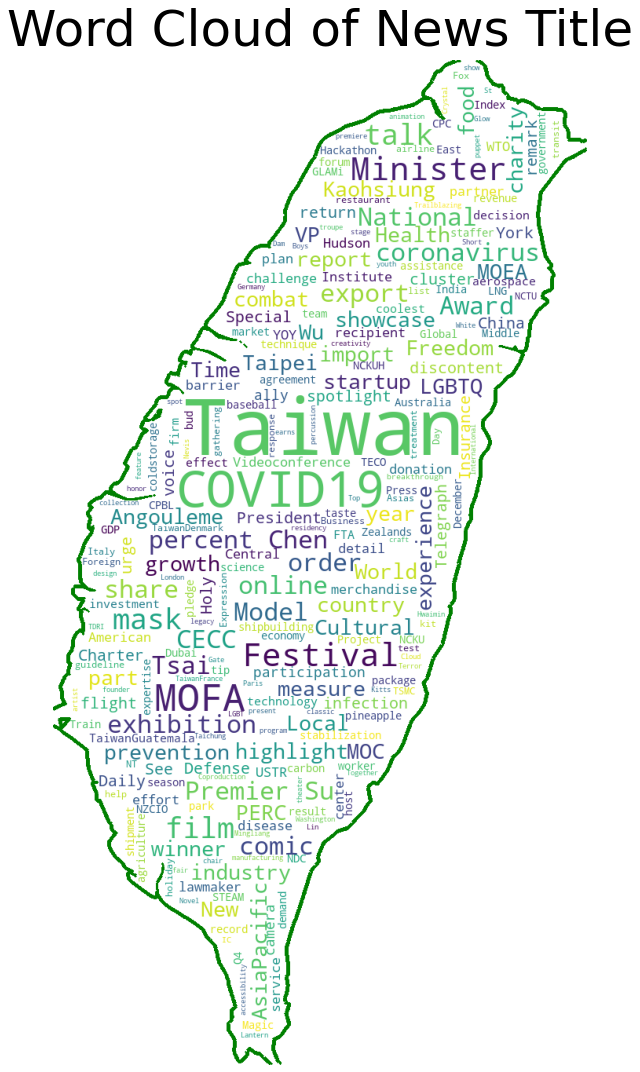

In [15]:
plot_wordcloud(title_tokens, mask=taiwan, title="Word Cloud of News Title",color = 'white')


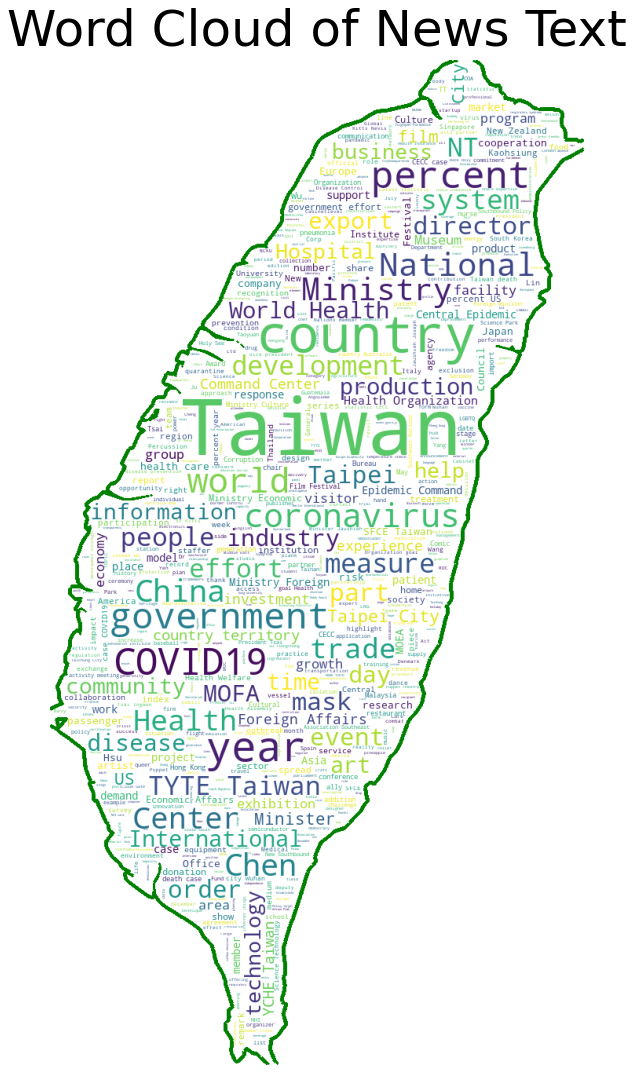

In [16]:
plot_wordcloud(content_tokens, mask=taiwan, title="Word Cloud of News Text",color = 'white')